<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-Libraries-Used" data-toc-modified-id="Python-Libraries-Used-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python Libraries Used</a></span></li><li><span><a href="#Automated-Pathology-Detection" data-toc-modified-id="Automated-Pathology-Detection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Automated Pathology Detection</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Should-you-Work-in-Colab,-Run-this-First" data-toc-modified-id="Should-you-Work-in-Colab,-Run-this-First-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Should you Work in Colab, Run this First</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Data Preparation</a></span></li></ul></li></ul></li><li><span><a href="#Example-Images" data-toc-modified-id="Example-Images-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Example Images</a></span></li><li><span><a href="#Image-Preprocessing" data-toc-modified-id="Image-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Image Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Example-Image-to-Process" data-toc-modified-id="Example-Image-to-Process-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Example Image to Process</a></span></li><li><span><a href="#Wavelet-Denoising" data-toc-modified-id="Wavelet-Denoising-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Wavelet Denoising</a></span></li><li><span><a href="#Contrast-Enhancement" data-toc-modified-id="Contrast-Enhancement-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Contrast Enhancement</a></span></li><li><span><a href="#Contrast-followed-by-Noise-Removal" data-toc-modified-id="Contrast-followed-by-Noise-Removal-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Contrast followed by Noise Removal</a></span></li></ul></li><li><span><a href="#Data-Preparation-for-Modeling" data-toc-modified-id="Data-Preparation-for-Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Preparation for Modeling</a></span></li><li><span><a href="#Predictive-Modeling-with-CNN:-Transfer-Learning-with-EfficientNet" data-toc-modified-id="Predictive-Modeling-with-CNN:-Transfer-Learning-with-EfficientNet-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Predictive Modeling with CNN: Transfer Learning with EfficientNet</a></span></li><li><span><a href="#Visualize-Model-Predictions" data-toc-modified-id="Visualize-Model-Predictions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Visualize Model Predictions</a></span></li><li><span><a href="#Augment-Data-with-Self-Learning" data-toc-modified-id="Augment-Data-with-Self-Learning-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Augment Data with Self-Learning</a></span><ul class="toc-item"><li><span><a href="#Unlabeled-Data-Pre-processing" data-toc-modified-id="Unlabeled-Data-Pre-processing-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Unlabeled Data Pre-processing</a></span></li><li><span><a href="#Extraction-of-Dense-Layer-Representations" data-toc-modified-id="Extraction-of-Dense-Layer-Representations-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Extraction of Dense Layer Representations</a></span></li><li><span><a href="#Label-Spreading-Modeling" data-toc-modified-id="Label-Spreading-Modeling-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Label Spreading Modeling</a></span></li><li><span><a href="#CNN-Label-Preparation" data-toc-modified-id="CNN-Label-Preparation-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>CNN Label Preparation</a></span></li><li><span><a href="#Re-training-CNN" data-toc-modified-id="Re-training-CNN-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Re-training CNN</a></span></li></ul></li></ul></div>

## Python Libraries Used

In [ ]:
!pip install -U efficientnet

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Image loading and processing
import os
from PIL import Image
from PIL import Image, ImageDraw

from skimage.restoration import denoise_wavelet, estimate_sigma
from skimage import exposure
from skimage import data, img_as_float
import cv2

# Modelng
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import hamming_loss


# utils
from progressbar import Percentage, ProgressBar,Bar,ETA
import pickle
import glob

# CNN
#!pip install -U efficientnet
import efficientnet.keras as efn
from keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import Model, Sequential
from keras.models import load_model, save_model 
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import tensorflow as tf


In [ ]:
print(tf.__version__) # 2.0 or above (eager execution enabled by default)

2.4.1


## Automated Pathology Detection 

This project is inspired by a closed Kaggle competition about [retinal disease detection](https://www.kaggle.com/c/vietai-advance-course-retinal-disease-detection/overview). Data was provided by the AI Department – Cao Thang Eye Hospital (CTEH).

### Introduction

Color-filtered fundus images visualize the rear of an eye called retina. A fundus image provides doctors with a snapshot of the interior of the patient eye and helps them to identify abnormalities that appear on the back of the eye.

![Anatomy of the eye](eye_image.png)

Eye diseases such as diabetic retinopathy and glaucoma can be disagnosed using fundus images. Patients can have two or more diseases concurrently. 

The objectives of this project are:
1. automating pathology detection of diabetic retinopathy and glaucoma using machine learning;
2. explaining the pathology sites of the image data.


### Data

The data set contains 3,435 retinal images that represent multiple pathological disorders. The patholgy classes and corresponding labels are included in 'train.csv' file and each image can have more than one class category (multiple pathologies).
The labels for each image are

```
-opacity (0), 
-diabetic retinopathy (1), 
-glaucoma (2),
-macular edema (3),
-macular degeneration (4),
-retinal vascular occlusion (5)
-normal (6)
```

The test data set contains 350 unlabelled images.

#### Should you Work in Colab, Run this First

In [3]:
# Run this cell if working in Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir('/content/drive/My Drive/FourthBrain/midterm/vision')

In [ ]:
# Run this cell if working in Colab
!ls

#### Data Preparation

In [8]:
pathology_df = pd.read_csv('./Data/train/train.csv')
print(pathology_df.shape)
pathology_df.sample(5)

(3435, 8)


,filename,opacity,diabetic retinopathy,glaucoma,macular edema,macular degeneration,retinal vascular occlusion,normal
2116,fa22b8fe4290.jpg,1,0,1,0,0,0,0
369,e465c211ec73.jpg,0,0,0,1,0,1,0
483,1585fad01e41.jpg,0,0,0,0,0,1,0
1955,cf7faabffdb2.jpg,0,0,0,0,1,0,0
2352,1dfb00fc6138.jpg,0,0,0,0,1,0,0


In [9]:
# keep normal images and retinopathy or glaucoma images
pathology_df = pathology_df.loc[(pathology_df['normal']==1) | 
                                ((pathology_df['diabetic retinopathy']==1) 
                                  | (pathology_df['glaucoma']==1))
                                ].drop(['opacity', 'macular edema',
                                        'macular degeneration', 'retinal vascular occlusion'], axis=1)
print(pathology_df.shape)
pathology_df.head(6)

(1858, 4)


,filename,diabetic retinopathy,glaucoma,normal
2,3f58d128caf6.jpg,0,1,0
18,10ee8c8a72b4.jpg,1,0,0
19,3b6da0297f92.jpg,1,0,0
20,677c30357c4e.jpg,1,0,0
23,90ff4cbcdc9b.jpg,1,0,0
24,b2dfb1372f52.jpg,1,0,0


In [10]:
# shuffle; reset index so loc and iloc will be equivalent when using indexes later
pathology_df = pathology_df.sample(frac=1, axis=1).reset_index(drop=True)
pathology_df.head()

,filename,glaucoma,normal,diabetic retinopathy
0,3f58d128caf6.jpg,1,0,0
1,10ee8c8a72b4.jpg,0,0,1
2,3b6da0297f92.jpg,0,0,1
3,677c30357c4e.jpg,0,0,1
4,90ff4cbcdc9b.jpg,0,0,1


In [11]:
# assign class label to distinguish cases
pathology_classes = pathology_df['diabetic retinopathy'].astype(str) + '-' \
+ pathology_df['glaucoma'].astype(str) + '-' \
+ pathology_df['normal'].astype(str)

np.unique(pathology_classes, return_counts=True)#[1]/len(pathology_classes)*100

(array(['0-0-1', '0-1-0', '1-0-0', '1-1-0'], dtype=object),
 array([525, 578, 736,  19]))

In [12]:
pathology_df['label'] = pathology_classes

In [13]:
pathology_df['label'] = pathology_df['label'].apply(lambda x: 'normal' if x == '0-0-1' 
                                                    else 'glaucoma' if x == '0-1-0'
                                                    else 'retinopathy' if x == '1-0-0' 
                                                    else 'both' if x == '1-1-0'
                                                    else '')


1. There are 19 images with multiple diseases (code 1-1-0)
2. There are 578 images with glaucoma
3. There are 736 with retinopathy
4. There are 525 normal images

(array([578.,   0.,   0., 736.,   0.,   0.,  19.,   0.,   0., 525.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

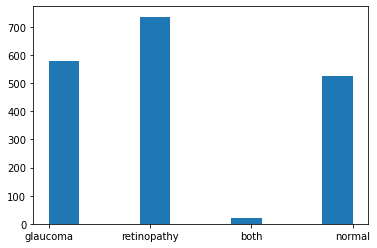

In [14]:
plt.hist(pathology_df['label'])


## Example Images

In [ ]:
def plot_rndm_images(label, img_path = "./Data/train/train/", rows_cols = (3,3), rnd_state=0):
    nrows, ncols=rows_cols[0], rows_cols[1]
    
    np.random.seed(rnd_state)
    imgs = np.random.choice(pathology_df.loc[pathology_df['label']==label]['filename'].values, 
                            size=np.prod(rows_cols))
    fig,ax = plt.subplots(nrows,ncols,figsize=(30,30))
    fig.suptitle('Examples of Label=' + str(label) + ' Images', fontsize=25)
    plt.subplots_adjust(wspace=0, hspace=0) 
    for i,j in enumerate(imgs[:nrows*ncols]):
        fname = os.path.join(img_path ,j)
        img = Image.open(fname)
        idcol = ImageDraw.Draw(img)
        idcol.rectangle(((1,1),(511,511)),outline='red') # each image has 96pxx96px
        plt.subplot(nrows, ncols, i+1) 
        plt.imshow(np.array(img))
        plt.axis('off')  

In [ ]:
plot_rndm_images('normal', rnd_state=0)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
plot_rndm_images('retinopathy', rnd_state=0)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
plot_rndm_images('glaucoma', rnd_state=0)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
plot_rndm_images('both', rnd_state=0)

Output hidden; open in https://colab.research.google.com to view.

## Image Preprocessing

1. Noise filtering (https://scikit-image.org/docs/dev/auto_examples/filters/plot_denoise_wavelet.html)
2. Contrast enhancement (https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html). Thee equalized image has roughly linear cumulative distribution. As you can see there is a lot of noise in the above image, because it considers the global contrast of the image, not just the local contrast.

### Example Image to Process

In [ ]:
imgs_0 = np.array(Image.open(os.path.join('./Data/train/train/',
                                          np.random.choice(pathology_df.loc[pathology_df['label']=='normal']['filename'].values, size=1)[0])))

(-0.5, 511.5, 511.5, -0.5)

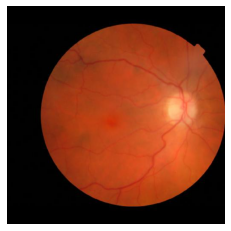

In [ ]:
plt.imshow(np.array(imgs_0))
plt.axis('off')  

### Wavelet Denoising

Wavelet denoising, or wavelet thresholding, is a wavelet transformation leading to a sparser representation of the image. The transformation concentrates image features in a few large-magnitude wavelet coefficients while shrinking or removing smaller coefficients considered to be noise.

(-0.5, 511.5, 511.5, -0.5)

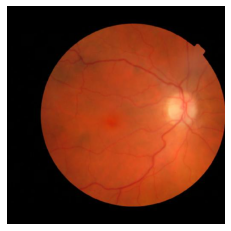

In [ ]:
im_bayes = denoise_wavelet(imgs_0, multichannel=True, convert2ycbcr=True,
                           method='BayesShrink', mode='soft',
                           rescale_sigma=True)

plt.imshow(np.array(im_bayes))
plt.axis('off')  

### Contrast Enhancement

(-0.5, 511.5, 511.5, -0.5)

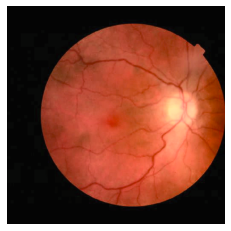

In [ ]:
# CLAHE applies to gray scale images 
# Conversion of RGB to LAB(L for lightness and a and b for the color opponents green–red and blue–yellow) 
# will do the work. Apply CLAHE to the converted image in LAB format to only Lightness component and convert 
# back the image to RGB. 

norm_image = cv2.normalize(im_bayes, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
norm_image = norm_image.astype(np.uint8)

lab = cv2.cvtColor(norm_image, cv2.COLOR_BGR2LAB)
lab_planes = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=2,tileGridSize=(4,4))
lab_planes[0] = clahe.apply(lab_planes[0])
lab = cv2.merge(lab_planes)
bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

plt.imshow(np.array(bgr))
plt.axis('off')  

### Contrast followed by Noise Removal

(-0.5, 511.5, 511.5, -0.5)

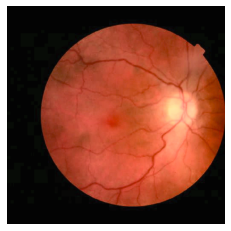

In [ ]:
# remove noise using thresholding
lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)
lab_planes = cv2.split(lab)
ret, thresh = cv2.threshold(lab_planes[0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
lab = cv2.merge(lab_planes)
bgr_1 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

plt.imshow(np.array(bgr_1))
plt.axis('off')  

In [ ]:
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

<ipython-input-21-8e3e6cd1b5be>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axes = np.zeros((2,4), dtype=np.object)
/Users/atambu/opt/anaconda3/lib/python3.8/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/Users/atambu/opt/anaconda3/lib/python3.8/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/Users/atambu/opt/anaconda3/lib/py

Text(0.5, 1.0, 'CLAHE+THRESH')

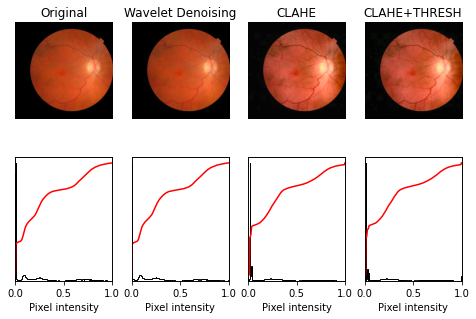

In [ ]:
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2,4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(imgs_0, axes[:, 0])
ax_img.set_title('Original')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(im_bayes, axes[:, 1])
ax_img.set_title('Wavelet Denoising')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(bgr, axes[:, 2])
ax_img.set_title('CLAHE')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(bgr_1, axes[:, 3])
ax_img.set_title('CLAHE+THRESH')

In [18]:
def preproc_img(img):
    
    # remove Gaussian noise
    img_proc = denoise_wavelet(img, multichannel=True, convert2ycbcr=True,
                               method='BayesShrink', mode='soft',
                               rescale_sigma=True)
    # Contrast enhancement - CLAHE - Gray scale image is needed
    ## 0-255 array
    img_proc = cv2.normalize(img_proc, None, alpha = 0, beta = 255, 
                             norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    img_proc = img_proc.astype(np.uint8)
    ## grey scale
    lab = cv2.cvtColor(img_proc, cv2.COLOR_BGR2LAB)
    lab_planes = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2,tileGridSize=(4,4))
    lab_planes[0] = clahe.apply(lab_planes[0])
    # Theshold based noise removal - grey scale is needed
    ret, thresh = cv2.threshold(lab_planes[0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    ## back to color scale
    lab = cv2.merge(lab_planes)
    img_proc = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    # convert to 0, 255 scale 
    img_proc = cv2.normalize(img_proc, None, alpha = 0, beta = 255, 
                             norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    img_proc = img_proc.astype(np.uint8)
        
    return img

In [ ]:
def plot_rndm_images(label, proc = False, img_path = "./Data/train/train/", rows_cols = (1,2), rnd_state=0):
    nrows, ncols=rows_cols[0], rows_cols[1]
    
    np.random.seed(rnd_state)
    imgs = np.random.choice(pathology_df.loc[pathology_df['label']==label]['filename'].values, 
                            size=np.prod(rows_cols))
    fig,ax = plt.subplots(nrows,ncols,figsize=(10,10))
    plt.subplots_adjust(wspace=0, hspace=0) 
    for i,j in enumerate(imgs[:nrows*ncols]):
        fname = os.path.join(img_path ,j)
        img = Image.open(fname)
        
        if proc:
            img_proc = preproc_img(np.array(img))
            img = Image.fromarray(img_proc)
            
        idcol = ImageDraw.Draw(img)
        idcol.rectangle(((1,1),(511,511)),outline='red') # each image has 96pxx96px
        plt.subplot(nrows, ncols, i+1) 
        plt.imshow(np.array(img))
        plt.axis('off')  

Examples of normal images. Preprocessed images are the bottom images


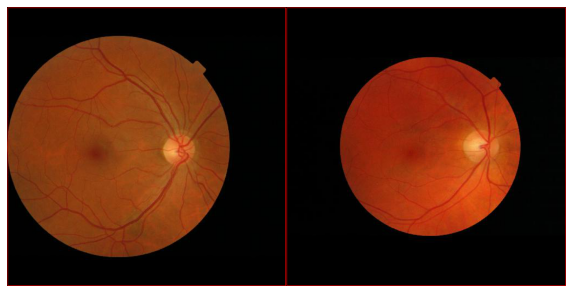

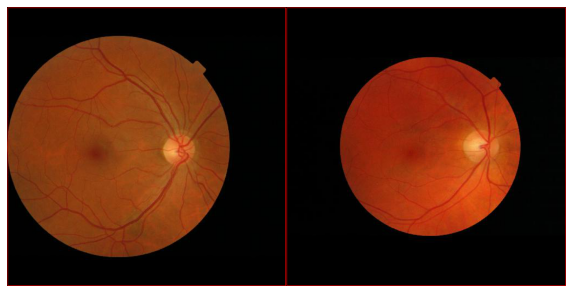

In [ ]:
label_ex = 'normal'
print('Examples of ' + label_ex, 'images. Preprocessed images are the bottom images')
plot_rndm_images(label_ex,False, rnd_state=2)
plot_rndm_images(label_ex, True, rnd_state=2)

Examples of retinopathy images. Preprocessed images are the bottom images


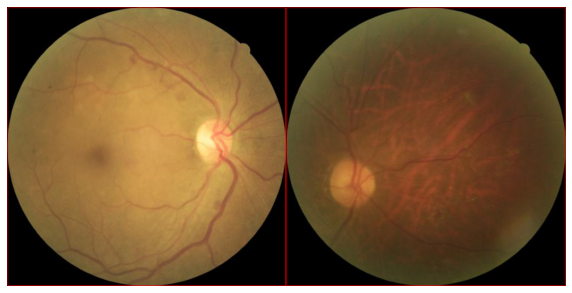

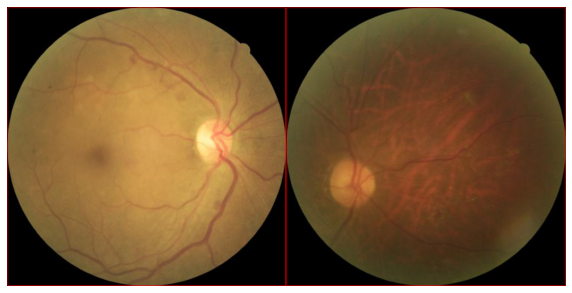

In [ ]:
label_ex = 'retinopathy'
print('Examples of ' + label_ex, 'images. Preprocessed images are the bottom images')
plot_rndm_images(label_ex,False, rnd_state=2)
plot_rndm_images(label_ex, True, rnd_state=2)

## Data Preparation for Modeling

The steps followed to prepare the data for modeling are:
1. binarize the class labels;
2. perform a 70/30 stratified data split and retain data set indexes of training and test spit;
2. retrieve and preprocess images for training and test set;
3. image augmentation.

In [20]:
# We binarize the class labels
lb = LabelBinarizer()
one_hot_labels = lb.fit_transform(pathology_df.label)
one_hot_labels

array([[0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [14]:
lb.inverse_transform(np.array([[0,1,0,0]]))

array(['glaucoma'], dtype='<U11')

training data size= 1393
test data size  = 465


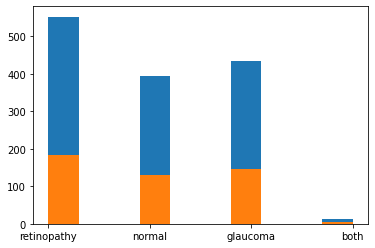

In [15]:
# training/test splits
train_index, test_index = train_test_split(pathology_df.index, 
                                           stratify=pathology_df.label, 
                                           random_state=10)

plt.hist(pathology_df.label.loc[train_index])
plt.hist(pathology_df.label.loc[test_index])

print(f'training data size= {len(pathology_df.label.loc[train_index])}')
print(f'test data size  = {len(pathology_df.label.loc[test_index])}')

In [16]:
def prepare_images(img_path, img_names, verbose=True):
    imgs = []
    if verbose:
        pbar = ProgressBar(widgets=[Bar('=', '[', ']'), ' ', Percentage(), ' ', ETA()],
                           maxval=len(img_names)).start()
    k = 0
    for i,j in enumerate(img_names):
        fname = os.path.join(img_path ,j)
        img = np.asarray(Image.open(fname), dtype=np.float32) # for drawing
        img = preproc_img(img) 
        imgs.append(img[None,:,:,:]/255)
        k += 1
        if verbose:
            pbar.update(k)
    if verbose:
        pbar.finish()

    imgs_np = np.concatenate(imgs, axis=0)
    
    return imgs_np

In [17]:
X_train = prepare_images("./Data/train/train/", 
                      pathology_df.filename.iloc[train_index], verbose=True)
X_train.shape

[=========================================================] 100% Time:  0:07:04


(1393, 512, 512, 3)

In [18]:
X_test = prepare_images("./Data/train/train/", 
                      pathology_df.filename.iloc[test_index], verbose=True)
X_test.shape

[=========================================================] 100% Time:  0:02:17


(465, 512, 512, 3)

In [19]:
y_train = one_hot_labels[train_index]
y_test = one_hot_labels[test_index]

In [20]:
import gc
gc.collect()

3613

We can regularize our model by augmenting our image data. Image augmentation includes transformations such as rotation, translation, reflection, shearing, and color permutation. TensorFlow provides the ImageDataGenerator class to perform image augmentation in memory; by default, your local storage won't save the newly generated images.

Regularization becomes necessary because the network we will be using later has about 4 million parameters, which is much larger than the number of available training images.

In [ ]:
# Create a Data Generator
data_gen_args = dict( 
    rotation_range=10.,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.2,
    channel_shift_range=0.05,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='constant',
    data_format="channels_last",
)
image_datagen = ImageDataGenerator(**data_gen_args)

image_datagen.fit(X_train)

We can visualize how the image augmentation function generates new images at each iteration using its specified parameters.

Iteration 0


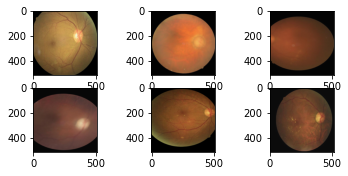

['retinopathy' 'glaucoma' 'glaucoma' 'glaucoma' 'retinopathy'
 'retinopathy']
Iteration 1


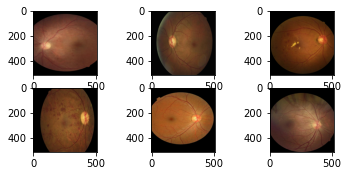

['retinopathy' 'glaucoma' 'retinopathy' 'retinopathy' 'normal' 'normal']
Iteration 2


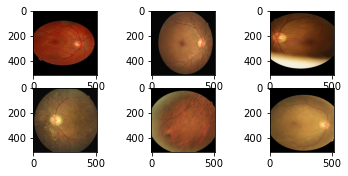

['normal' 'normal' 'retinopathy' 'retinopathy' 'glaucoma' 'retinopathy']
Iteration 3


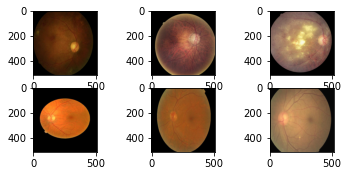

['retinopathy' 'glaucoma' 'retinopathy' 'normal' 'normal' 'glaucoma']
Iteration 4


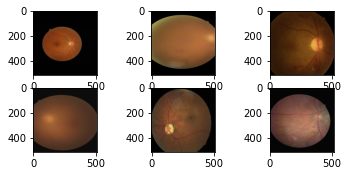

['normal' 'retinopathy' 'retinopathy' 'glaucoma' 'glaucoma' 'glaucoma']


In [ ]:
aug_batch_size = 6
batch_datagen = image_datagen.flow(X_train, pathology_df.label.iloc[train_index], batch_size=aug_batch_size)

for e in range(5):
    print('Iteration', e)
    batches = 0
    for x_batch, y_batch in batch_datagen:
        #print(x_batch.shape)
        for i in range(0, aug_batch_size):
            plt.subplot(330+1 + i)
            plt.imshow(x_batch[i], cmap=plt.get_cmap('gray'))
        

        plt.show()
        print(y_batch)
        break

## Predictive Modeling with CNN: Transfer Learning with EfficientNet

According to this [paper](https://papers.nips.cc/paper/2019/file/eb1e78328c46506b46a4ac4a1e378b91-Paper.pdf):
"transfer learning offers limited performance gains and much smaller architectures can perform
comparably to the standard IMAGENET models". However, substantial gain in terms of speeding the computation arises when "Use the pretrained weights only from the lowest two layers. The rest of the network is randomly initialized and fine-tuned for the medical imaging task." (see [here](https://theaisummer.com/medical-imaging-transfer-learning/) for example). We will use transfer learning to initialize the open-sourced EfficientNet network for our task and train in multiclassification mode (with all layers frozen except the classification (top) layers.

In [ ]:
#!pip install -U efficientnet
# https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/

In [ ]:
clear_session()
base_model = efn.EfficientNetB0(weights='imagenet', #using pre-trained weights
                        input_shape=(512, 512, 3),
                        include_top=False # rm thee last fully connected layer
                       )

# make layers non-trainable except...
for layer in base_model.layers:
    layer.trainable = False

# the top layers, which we rebuild here
x = GlobalAveragePooling2D(name="avg_pool")(base_model.output)
x = BatchNormalization()(x)

top_dropout_rate = 0.2
x = Dropout(top_dropout_rate, name="top_dropout")(x)
# adding more layers helps
#x = Dense(1024, activation="relu")(x)
#x = Dropout(0.5)(x)
#x = Dense(1024, activation="relu")(x)
#x = Dropout(0.5)(x)
out = Dense(4, activation="softmax", name="pred")(x) 

custom_base_model = Model(base_model.input, out)

# print the layers of the CNN
#custom_base_model.summary()

16809984/16804768 [==============================] - 1s 0us/step


In [ ]:
batch_size = 32 # number of images generated for a batch
steps_per_epoch = int(len(X_train) / batch_size)
n_epochs = 100

In [ ]:
custom_base_model.compile(loss="categorical_crossentropy", optimizer=Adam(0.001), 
                         metrics=["categorical_accuracy"])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, 
                   restore_best_weights=True, 
                   patience=5)
#cp = ModelCheckpoint("efficientNet.h5", 
#                      monitor="val_categorical_accuracy", 
#                      save_best_only=True, 
#                      save_weights_only=True, 
#                      verbose=1,mode='max')
                
batch_datagen = image_datagen.flow(X_train, y_train, batch_size=batch_size)

custom_base_model_history = custom_base_model.fit(batch_datagen,
                                                  steps_per_epoch=steps_per_epoch, 
                                                  epochs=n_epochs, 
                                                  validation_data=(X_test, y_test), 
                                                  callbacks=[es])


Epoch 1/100
43/43 [==============================] - 86s 2s/step - loss: 1.4210 - categorical_accuracy: 0.4433 - val_loss: 1.0217 - val_categorical_accuracy: 0.5398
Epoch 2/100
43/43 [==============================] - 65s 2s/step - loss: 0.7790 - categorical_accuracy: 0.6905 - val_loss: 0.9445 - val_categorical_accuracy: 0.5914
Epoch 3/100
43/43 [==============================] - 66s 2s/step - loss: 0.6701 - categorical_accuracy: 0.7311 - val_loss: 0.8605 - val_categorical_accuracy: 0.6688
Epoch 4/100
43/43 [==============================] - 65s 2s/step - loss: 0.6222 - categorical_accuracy: 0.7469 - val_loss: 0.7988 - val_categorical_accuracy: 0.6968
Epoch 5/100
43/43 [==============================] - 65s 2s/step - loss: 0.6193 - categorical_accuracy: 0.7455 - val_loss: 0.7527 - val_categorical_accuracy: 0.7183
Epoch 6/100
43/43 [==============================] - 65s 2s/step - loss: 0.5931 - categorical_accuracy: 0.7399 - val_loss: 0.6985 - val_categorical_accuracy: 0.7118
Epoch 7/10

In [ ]:
training_loss = custom_base_model_history.history['loss']
val_loss = custom_base_model_history.history['val_loss']
training_acc = custom_base_model_history.history['categorical_accuracy']
val_acc = custom_base_model_history.history['val_categorical_accuracy']

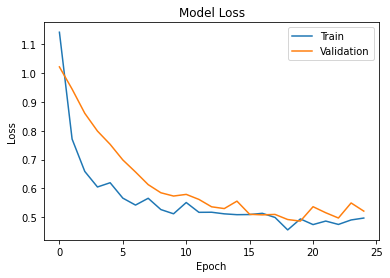

In [ ]:
plt.plot(training_loss)
plt.plot(val_loss)
plt.title('Model Loss')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

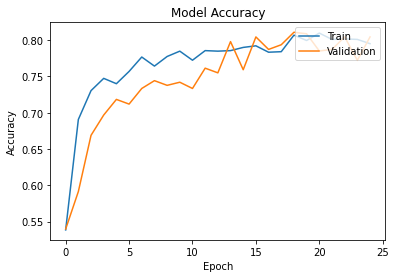

In [ ]:
plt.plot(training_acc)
plt.plot(val_acc)
plt.title('Model Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
custom_base_model.save('./efficientNet')

INFO:tensorflow:Assets written to: ./efficientNet/assets


In [3]:
custom_base_model = load_model('./efficientNet')

When we train the classification layers only, we observe a validation loss that holds higher than the training loss. This happens because we train on augmented images and validate on actual images.

In [4]:
# evaluate the model on the test set
labels_preds = custom_base_model.predict(X_test, use_multiprocessing=True, verbose=1).argmax(axis=-1)

NameError: name 'X_test' is not defined

In [ ]:
labels_preds = [lb.classes_[i] for i in labels_preds]

In [ ]:
labels_test = [lb.classes_[i] for i in y_test.argmax(-1)]

In [ ]:
cm = confusion_matrix(labels_test, labels_preds)
acc   = accuracy(labels_test, labels_preds)
rec   = recall(labels_test, labels_preds, average='micro')
prec  = precision(labels_test, labels_preds, average='micro')
f1    = f1_score(labels_test, labels_preds, average='micro')

# Print the metrics, display the confusion matrix, and visualize the model
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(lb.classes_)
print(cm)

Depending on the business case, we would eventually optimize the detection of pathological images vs normal images. This would require to maximize the recall during training.

## Visualize Model Predictions

We will visualize a saliency heatmap using [grad-CAM](https://keras.io/examples/vision/grad_cam/) algorithm to demonstrate what regions of interest contribute to diabetic retinopathy, glaucoma, or both.

For example, if we select label_ex='glaucome' below, we will have a sequence of random eye images affected with glaucoma along with a heatmap representing what the model sees. The heatmap next to each eye image highlights the area of the image that led the model to decide about the label to assign. For glaucoma, the heatmap highlights with brighter colors the optic nerve damage region. For retinopathy, the heatmap highlights the damaged blood vessels in the back of the eye

In [15]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [16]:
last_conv_layer_name = custom_base_model.layers[-5].name
keep_activations = custom_base_model.layers[-1].activation
#print(last_conv_layer_name)

Image: b60b9bd6d1d6.jpg  with true label: glaucoma
Model prediction:
	both           	with probability 0.003
	glaucoma       	with probability 0.641
	normal         	with probability 0.034
	retinopathy    	with probability 0.322
Explanation for 'glaucoma'


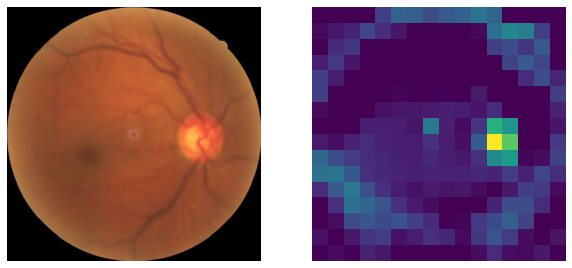

In [28]:
from IPython.display import clear_output
import time

def animate(label_ex='glaucoma'):
    # select a random image labeled as label_ex
    img_idx = np.random.choice(pathology_df.loc[pathology_df['label']==label_ex].index.values, 
                               size=1)
    img_name = pathology_df.iloc[img_idx]['filename'].values[0]
    img_array = np.array(Image.open(os.path.join('./Data/train/train/', img_name)))
    img_array = preproc_img(img_array)[None,]/255
    img_true_label = pathology_df.iloc[img_idx]['label'].values[0]

    # evaluate prediction
    predictions = custom_base_model.predict(img_array)[0] #probs
    classes = [lb.classes_[i] for i in range(len(predictions))] # classes with increasing prob
    cls = np.argmax(predictions)
    class_name = classes[cls]

    # Remove last layer's softmax
    custom_base_model.layers[-1].activation = None

    # Generate class activation heatmap
    heatmap = make_gradcam_heatmap(img_array, custom_base_model, last_conv_layer_name)

    custom_base_model.layers[-1].activation = keep_activations

    # Display heatmap
    print('Image:', img_name, ' with true label:', img_true_label)
    print('Model prediction:')
    for c, p in zip(classes, predictions):
        print('\t{:15s}\twith probability {:.3f}'.format(c, p))
    print("Explanation for '{}'".format(class_name))
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))
    ax1.imshow(np.array(img_array[0,]))
    ax1.axis('off')  
    ax2.matshow(heatmap)
    ax2.axis('off')  
    plt.show()

clear_output(wait=True)
time.sleep(5)
for i in range(20):
    clear_output(wait=True)
    animate()
    time.sleep(2)

## Augment Data with Self-Learning

We will use unlabeled images to augment the labeled images and eventually improve the predictive model.
The process used consists of the following steps:

1. pre-processing new images using the same pre-processing approach defined during model training; 
2. passing the unlabelled pre-processed images through the trained model and retrieve the dense layer feature prior to the classification layer;
3. doing the same for training images;
4. using this dense layer as representative of the image, apply label propagation to retrieve labels correspndng to the unbalelled data. The dense representations of labeled and unlabelled data are concatenated;
5. re-training the CNN with all data, including the newly labeled data.

### Unlabeled Data Pre-processing

In [22]:
X_new = prepare_images("./", 
                       [i for i in glob.glob("./Data/test/test/*.jpg")], verbose=True)
X_new.shape

[=========================================================] 100% Time:  0:01:38


(350, 512, 512, 3)

### Extraction of Dense Layer Representations

In [23]:
# extract dense representation of unlabeled images
dense_layer_output = custom_base_model.layers[-2].output
model_tmp = Model(custom_base_model.input, outputs=[dense_layer_output])
dense_X_new = model_tmp.predict(X_new, use_multiprocessing=True, verbose=1)
dense_X_new.shape

11/11 [==============================] - 19s 193ms/step


(350, 1280)

In [30]:
# extract dense representation of labeled images
dense_X_train = model_tmp.predict(X_train, use_multiprocessing=True, verbose=1)
y_train_l = 1+np.array([list(lb.classes_).index(i) for i in lb.inverse_transform(y_train)])
dense_X_train.shape

44/44 [==============================] - 7s 163ms/step


(1393, 1280)

In [28]:
# extract dense representation of labeled images
dense_X_test = model_tmp.predict(X_test, use_multiprocessing=True, verbose=1)
y_test_l = 1+np.array([list(lb.classes_).index(i) for i in lb.inverse_transform(y_test)])
dense_X_test.shape

15/15 [==============================] - 2s 165ms/step


(465, 1280)

In [31]:
# combine labeled/unlabeled data and prepare for training
x_mixed = np.concatenate((dense_X_train, dense_X_new))
# create "no label" for unlabeled data
nolabel = [-1 for _ in range(len(dense_X_new))]
# recombine training dataset labels
y_mixed = np.concatenate((y_train_l, 
                          nolabel))

### Label Spreading Modeling

We will use label spreading with a KNN kernel. As we can see from the results, the incorrectly labeled data increases with the number of used neighbors. This indicates that the set of images are diverse and not many similar images are available in the dataset.

In [39]:
for n_neighbors in [1,3,5,7,9,11]:
    lp_model = LabelSpreading(kernel='knn', alpha=0.01,max_iter=20, n_neighbors=n_neighbors)
    lp_model.fit(dense_X_train, y_train_l)
    semi_sup_preds = lp_model.predict(dense_X_test)
    
    cm = confusion_matrix(y_test_l, semi_sup_preds)
    acc  = accuracy(y_test_l, semi_sup_preds)
    rec  = recall(y_test_l, semi_sup_preds, average='micro')
    prec = precision(y_test_l, semi_sup_preds, average='micro')
    f1   = f1_score(y_test_l, semi_sup_preds, average='micro')
    hl   = hamming_loss(y_test_l, semi_sup_preds)

    print('# neighbors', n_neighbors)
    print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}, Hamming Loss = {hl}')
    print('Confusion Matrix is:')
    print(cm)    

# neighbors 1
Accuracy = 0.8150537634408602, Precision = 0.8150537634408602, Recall = 0.8150537634408602, F1-score = 0.8150537634408602, Hamming Loss = 0.18494623655913978
Confusion Matrix is:
[[  1   1   0   3]
 [  2 112  12  19]
 [  0   7 120   4]
 [  2  34   2 146]]
# neighbors 3
Accuracy = 0.8086021505376344, Precision = 0.8086021505376344, Recall = 0.8086021505376344, F1-score = 0.8086021505376345, Hamming Loss = 0.1913978494623656
Confusion Matrix is:
[[  0   3   0   2]
 [  2 104  10  29]
 [  0   8 120   3]
 [  1  31   0 152]]
# neighbors 5
Accuracy = 0.8021505376344086, Precision = 0.8021505376344086, Recall = 0.8021505376344086, F1-score = 0.8021505376344086, Hamming Loss = 0.1978494623655914
Confusion Matrix is:
[[  0   2   0   3]
 [  0 100  12  33]
 [  0   9 121   1]
 [  0  31   1 152]]
# neighbors 7
Accuracy = 0.7827956989247312, Precision = 0.7827956989247312, Recall = 0.7827956989247312, F1-score = 0.7827956989247312, Hamming Loss = 0.2172043010752688
Confusion Matrix is:


In [40]:
lp_model = LabelSpreading(kernel='knn', alpha=0.01,max_iter=20, n_neighbors=1)
lp_model.fit(x_mixed, y_mixed)

/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


LabelSpreading(alpha=0.01, gamma=20, kernel='knn', max_iter=20, n_jobs=None,
               n_neighbors=1, tol=0.001)

In [41]:
# extract labels for the originally unlabeled data
y_new = lb.transform([lb.classes_[i-1] for i in lp_model.predict(dense_X_new)])
y_new.shape

(350, 4)

### CNN Label Preparation

In [42]:
y_mixed = np.concatenate((y_train, 
                          y_new))
y_mixed.shape

(1743, 4)

### Re-training CNN

We tried with and without augmenting images during training. The final performance on the test set was not affected. However, using these new images labeled through semi-supervised learning improved the performance on the test set with respect to the original model of about 2%.

In [59]:
clear_session()
base_model = efn.EfficientNetB0(weights='imagenet', #using pre-trained weights
                        input_shape=(512, 512, 3),
                        include_top=False # rm thee last fully connected layer
                       )

# make layers non-trainable except...
for layer in base_model.layers:
    layer.trainable = False

# the top layers, which we rebuild here
x = GlobalAveragePooling2D(name="avg_pool")(base_model.output)
x = BatchNormalization()(x)

top_dropout_rate = 0.2
x = Dropout(top_dropout_rate, name="top_dropout")(x)
# adding more layers helps
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
out = Dense(4, activation="softmax", name="pred")(x) 

custom_base_model = Model(base_model.input, out)

# print the layers of the CNN
#custom_base_model.summary()

In [54]:
batch_size = 32 # number of images generated for a batch
n_epochs = 100

In [ ]:
steps_per_epoch = int((len(X_train)+len(X_new)) / batch_size)

data_gen_args = dict( 
    rotation_range=10.,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.2,
    channel_shift_range=0.05,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='constant',
    data_format="channels_last",
)
image_datagen = ImageDataGenerator(**data_gen_args)

image_datagen.fit(np.concatenate((X_train, X_new)))

In [60]:
custom_base_model.compile(loss="categorical_crossentropy", optimizer=Adam(0.001), 
                         metrics=["categorical_accuracy"])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, 
                   restore_best_weights=True, 
                   patience=5)
                
#batch_datagen = image_datagen.flow(np.concatenate((X_train, X_new)), y_mixed, batch_size=batch_size)

custom_base_model_history = custom_base_model.fit(#batch_datagen,
                                                  np.concatenate((X_train, X_new)), y_mixed,
                                                  epochs=n_epochs, 
                                                  #steps_per_epoch = steps_per_epoch,
                                                  validation_data=(X_test, y_test), 
                                                  callbacks=[es])


Epoch 1/100
55/55 [==============================] - 20s 244ms/step - loss: 1.5220 - categorical_accuracy: 0.4785 - val_loss: 1.2469 - val_categorical_accuracy: 0.3677
Epoch 2/100
55/55 [==============================] - 12s 216ms/step - loss: 0.9628 - categorical_accuracy: 0.6072 - val_loss: 1.1966 - val_categorical_accuracy: 0.5226
Epoch 3/100
55/55 [==============================] - 12s 216ms/step - loss: 0.9102 - categorical_accuracy: 0.6128 - val_loss: 1.0725 - val_categorical_accuracy: 0.6409
Epoch 4/100
55/55 [==============================] - 12s 216ms/step - loss: 0.8781 - categorical_accuracy: 0.6056 - val_loss: 0.9709 - val_categorical_accuracy: 0.7247
Epoch 5/100
55/55 [==============================] - 12s 216ms/step - loss: 0.8228 - categorical_accuracy: 0.6532 - val_loss: 0.9378 - val_categorical_accuracy: 0.6258
Epoch 6/100
55/55 [==============================] - 12s 216ms/step - loss: 0.7655 - categorical_accuracy: 0.6598 - val_loss: 0.8901 - val_categorical_accuracy:

In [61]:
training_loss = custom_base_model_history.history['loss']
val_loss = custom_base_model_history.history['val_loss']
training_acc = custom_base_model_history.history['categorical_accuracy']
val_acc = custom_base_model_history.history['val_categorical_accuracy']

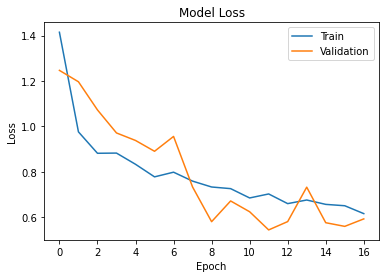

In [62]:
plt.plot(training_loss)
plt.plot(val_loss)
plt.title('Model Loss')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

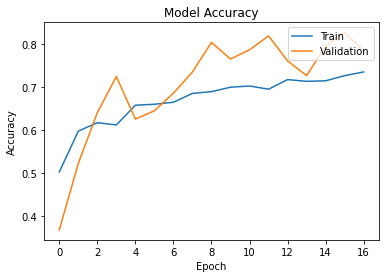

In [63]:
plt.plot(training_acc)
plt.plot(val_acc)
plt.title('Model Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [64]:
custom_base_model.save('./efficientNet_ls')

INFO:tensorflow:Assets written to: ./efficientNet_ls/assets


In [66]:
# evaluate the model on the test set
labels_preds = custom_base_model.predict(X_test, use_multiprocessing=True, verbose=1).argmax(axis=-1)

15/15 [==============================] - 2s 164ms/step


In [67]:
labels_preds = [lb.classes_[i] for i in labels_preds]

In [68]:
labels_test = [lb.classes_[i] for i in y_test.argmax(-1)]

In [69]:
cm = confusion_matrix(labels_test, labels_preds)
acc   = accuracy(labels_test, labels_preds)
rec   = recall(labels_test, labels_preds, average='micro')
prec  = precision(labels_test, labels_preds, average='micro')
f1    = f1_score(labels_test, labels_preds, average='micro')

# Print the metrics, display the confusion matrix, and visualize the model
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(lb.classes_)
print(cm)

Accuracy = 0.8193548387096774, Precision = 0.8193548387096774, Recall = 0.8193548387096774, F1-score = 0.8193548387096774
Confusion Matrix is:
['both' 'glaucoma' 'normal' 'retinopathy']
[[  2   1   0   2]
 [  2  91   5  47]
 [  2   7 119   3]
 [  2  12   1 169]]
